In [2]:
# import opendatasets as od
# od.download("https://www.kaggle.com/datasets/l3llff/flowers/")

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten
from keras.layers import Dropout, Flatten,Activation
from keras.layers import  BatchNormalization
from keras.models import Sequential, Model

from keras.layers import Dense
from keras.optimizers import Adam
from tensorflow.keras import layers
import os
# Path a las imagenes
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.xception import preprocess_input

from tensorflow.keras.applications.xception import Xception

from keras import backend as K
from tensorflow.keras.preprocessing.image import load_img


2023-12-19 00:12:45.513115: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-19 00:12:45.571261: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-19 00:12:45.571312: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-19 00:12:45.575739: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-19 00:12:45.589645: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-19 00:12:45.590399: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
flowers_path = './flowers/flowers'

classes = os.listdir(flowers_path)
len(classes)


16

In [3]:
classes

['rose',
 'water_lily',
 'magnolia',
 'calendula',
 'california_poppy',
 'black_eyed_susan',
 'common_daisy',
 'iris',
 'astilbe',
 'coreopsis',
 'bellflower',
 'dandelion',
 'carnation',
 'sunflower',
 'daffodil',
 'tulip']

In [5]:

image_size = (128, 128)
input_shape = (128,128, 3)

batch_size = 32


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    flowers_path,
    validation_split=0.2,          
    subset="training",             
    seed=42,                     
    image_size=image_size,         
    batch_size=batch_size,         
    label_mode="categorical",      
    class_names=classes
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    flowers_path,
    validation_split=0.2,
    subset="validation",         
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
    label_mode="categorical",
    class_names=classes
)

Found 15740 files belonging to 16 classes.
Using 12592 files for training.
Found 15740 files belonging to 16 classes.
Using 3148 files for validation.


In [6]:

# Define your preprocessing function
def preprocess_image(image, label):
    image = preprocess_input(image)
    return image, label


In [7]:
train_ds = train_ds.map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
val_ds = val_ds.map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)


In [9]:
# Perceptron model definition
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(200, activation="relu"),
        layers.Dense(10, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(1000, activation='relu'),
        
        layers.Dense(len(classes), activation="softmax"),
    ]
)

model.build(input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 200)               9830600   
                                                                 
 dense_1 (Dense)             (None, 10)                2010      
                                                                 
 dense_2 (Dense)             (None, 100)               1100      
                                                                 
 dense_3 (Dense)             (None, 1000)              101000    
                                                                 
 dense_4 (Dense)             (None, 16)                16016     
                                                                 
Total params: 9,950,726
Trainable params: 9,950,726
Non-

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [11]:
history = model.fit(train_ds, epochs=10, verbose=1, validation_data=val_ds)


Epoch 1/10
394/394 [==============================] - 7s 16ms/step - loss: 2.8105 - accuracy: 0.0755 - val_loss: 2.8135 - val_accuracy: 0.0619
Epoch 2/10
394/394 [==============================] - 6s 16ms/step - loss: 2.7725 - accuracy: 0.0685 - val_loss: 2.7773 - val_accuracy: 0.0651
Epoch 3/10
394/394 [==============================] - 6s 16ms/step - loss: 2.6673 - accuracy: 0.0945 - val_loss: 2.5353 - val_accuracy: 0.1213
Epoch 4/10
394/394 [==============================] - 6s 16ms/step - loss: 2.4581 - accuracy: 0.1333 - val_loss: 2.3788 - val_accuracy: 0.1572
Epoch 5/10
394/394 [==============================] - 6s 16ms/step - loss: 2.3733 - accuracy: 0.1569 - val_loss: 2.3011 - val_accuracy: 0.1782
Epoch 6/10
394/394 [==============================] - 6s 15ms/step - loss: 2.2970 - accuracy: 0.1835 - val_loss: 2.3037 - val_accuracy: 0.1833
Epoch 7/10
394/394 [==============================] - 6s 16ms/step - loss: 2.2832 - accuracy: 0.1943 - val_loss: 2.2063 - val_accuracy: 0.1846

### we see that perceptron  (obvioussly) is not working.
### lets build CNN thus! 

In [13]:
# # modelling  using a CNN.
model_cnn = keras.Sequential([
    Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    
    Conv2D(filters=96, kernel_size=(3, 3), padding='Same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    
    Conv2D(filters=96, kernel_size=(3, 3), padding='Same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    
    Flatten(),
    Dense(512),
    Activation('relu'),
    Dense(16, activation="softmax")
])
model_cnn.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model_cnn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 96)      

In [14]:
history_cnn = model_cnn.fit(train_ds, epochs=10, verbose=1, validation_data=val_ds)


Epoch 1/10


2023-12-17 17:43:39.697700: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-12-17 17:43:40.420261: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-17 17:43:40.420718: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-17 17:43:40.420752: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-12-17 17:43:40.421219: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-17 17:43:40.421294: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


394/394 [==============================] - 11s 23ms/step - loss: 1.7383 - accuracy: 0.4149 - val_loss: 1.3965 - val_accuracy: 0.5343
Epoch 2/10
394/394 [==============================] - 9s 22ms/step - loss: 1.2417 - accuracy: 0.5877 - val_loss: 1.1740 - val_accuracy: 0.6045
Epoch 3/10
394/394 [==============================] - 9s 22ms/step - loss: 0.9546 - accuracy: 0.6784 - val_loss: 1.1518 - val_accuracy: 0.6325
Epoch 4/10
394/394 [==============================] - 9s 22ms/step - loss: 0.6823 - accuracy: 0.7666 - val_loss: 1.1826 - val_accuracy: 0.6483
Epoch 5/10
394/394 [==============================] - 9s 22ms/step - loss: 0.4500 - accuracy: 0.8456 - val_loss: 1.3203 - val_accuracy: 0.6449
Epoch 6/10
394/394 [==============================] - 9s 22ms/step - loss: 0.3097 - accuracy: 0.8960 - val_loss: 1.5571 - val_accuracy: 0.6404
Epoch 7/10
394/394 [==============================] - 9s 22ms/step - loss: 0.2006 - accuracy: 0.9306 - val_loss: 1.7125 - val_accuracy: 0.6566
Epoch 8/1

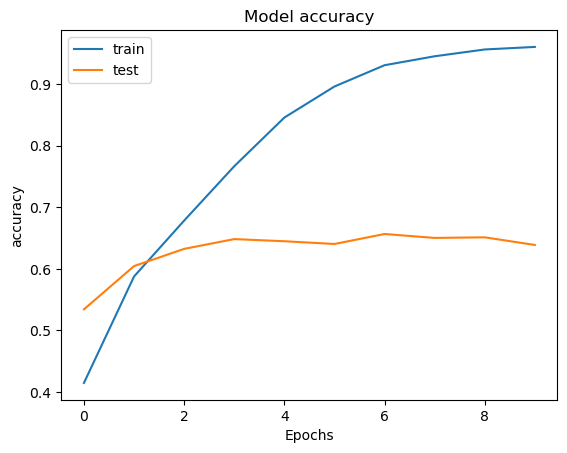

In [15]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [16]:
### Much better. But lets see what if we fine tuen Xception. Then we can do some augmentation and regularisartion, add  callbacks to save the best model and do early stop. 
# For convinience lets put the model onto a func.

In [18]:
def get_model():
    # Get base model 
    base_model = Xception(
        weights="imagenet",
        include_top=False,
        input_shape=input_shape)
    # Freeze the layers in base model
    for layer in base_model.layers:
        layer.trainable = False
    # Get base model output 
    base_model_ouput = base_model.output
    
    # Add new layers
    x = Flatten()(base_model.output)
    x = Dense(500, activation='relu', name='fc1')(x)
    x = Dropout(0.2)(x)
    x = Dense(16, activation='softmax', name='fc2')(x)
    
    model = Model(inputs=base_model.input, outputs=x)
    return model

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

In [22]:
# Get the model
model = get_model()
# Compile it
opt = Adam(lr=1e-3, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
#Summary
# model.summary()
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')
history_fine=model.fit(train_ds, epochs=20, verbose=1, validation_data=val_ds, callbacks=[chechpoint,early_stopping]
)

Epoch 1/20
394/394 [==============================] - 24s 54ms/step - loss: 1.4668 - accuracy: 0.6382 - val_loss: 0.8269 - val_accuracy: 0.7513
Epoch 2/20
394/394 [==============================] - 21s 53ms/step - loss: 0.7893 - accuracy: 0.7490 - val_loss: 0.7643 - val_accuracy: 0.7681
Epoch 3/20
394/394 [==============================] - 21s 53ms/step - loss: 0.6259 - accuracy: 0.7998 - val_loss: 0.7454 - val_accuracy: 0.7830
Epoch 4/20
394/394 [==============================] - 21s 53ms/step - loss: 0.5278 - accuracy: 0.8251 - val_loss: 0.7460 - val_accuracy: 0.7878
Epoch 5/20
394/394 [==============================] - 21s 53ms/step - loss: 0.4443 - accuracy: 0.8526 - val_loss: 0.7391 - val_accuracy: 0.7942
Epoch 6/20
394/394 [==============================] - 21s 53ms/step - loss: 0.4177 - accuracy: 0.8600 - val_loss: 0.7949 - val_accuracy: 0.8043
Epoch 7/20
394/394 [==============================] - 21s 52ms/step - loss: 0.3653 - accuracy: 0.8785 - val_loss: 0.8225 - val_accuracy:

In [25]:
history_fine.history

{'loss': [1.466790795326233,
  0.7893440127372742,
  0.6258841753005981,
  0.5277982950210571,
  0.44425690174102783,
  0.4176659882068634,
  0.36533570289611816,
  0.3521670401096344],
 'accuracy': [0.6381829977035522,
  0.7489675879478455,
  0.799793541431427,
  0.8251270651817322,
  0.8526048064231873,
  0.8599904775619507,
  0.8784942626953125,
  0.8834974765777588],
 'val_loss': [0.8268682360649109,
  0.7643161416053772,
  0.7453921437263489,
  0.7459679841995239,
  0.7390592098236084,
  0.7949084043502808,
  0.8224667310714722,
  0.8101428151130676],
 'val_accuracy': [0.7512706518173218,
  0.7681067585945129,
  0.7830368280410767,
  0.7878018021583557,
  0.7941550016403198,
  0.804320216178894,
  0.8001905679702759,
  0.8011435866355896]}

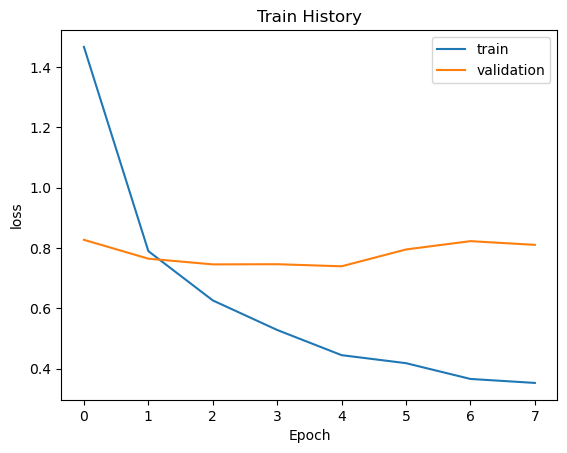

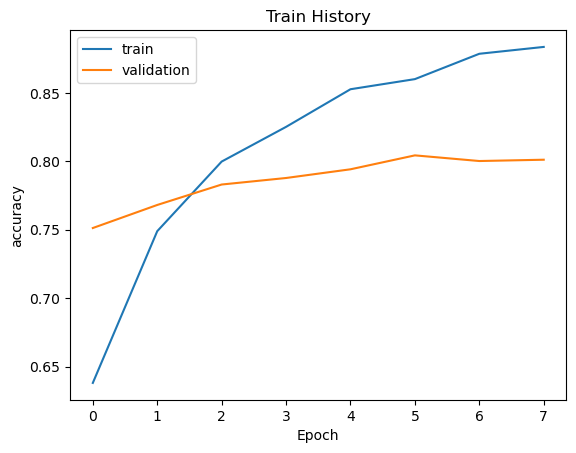

In [26]:
show_train_history(history_fine,'loss','val_loss')
show_train_history(history_fine,'accuracy','val_accuracy')


In [27]:
augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2)    
]
def data_augmentation(x):
    for layer in augmentation_layers:
        x = layer(x)
    return x


train_ds_aug = train_ds.map(lambda x, y: (data_augmentation(x), y))

In [30]:
# Get the model
model = get_model()
# Compile it
opt = Adam(lr=1e-3, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
#Summary
# model.summary()
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v2_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')

history_fine_aug=model.fit(train_ds_aug, epochs=20, verbose=1, validation_data=val_ds, callbacks=[chechpoint,early_stopping])

Epoch 1/20
394/394 [==============================] - 24s 55ms/step - loss: 1.4461 - accuracy: 0.6397 - val_loss: 0.9539 - val_accuracy: 0.6852
Epoch 2/20
394/394 [==============================] - 21s 53ms/step - loss: 0.7723 - accuracy: 0.7570 - val_loss: 0.7986 - val_accuracy: 0.7602
Epoch 3/20
394/394 [==============================] - 21s 53ms/step - loss: 0.6272 - accuracy: 0.7992 - val_loss: 0.6939 - val_accuracy: 0.7900
Epoch 4/20
394/394 [==============================] - 21s 53ms/step - loss: 0.5006 - accuracy: 0.8325 - val_loss: 0.7398 - val_accuracy: 0.7916
Epoch 5/20
394/394 [==============================] - 23s 59ms/step - loss: 0.4429 - accuracy: 0.8520 - val_loss: 0.7420 - val_accuracy: 0.7957
Epoch 6/20
394/394 [==============================] - 21s 52ms/step - loss: 0.3859 - accuracy: 0.8720 - val_loss: 0.7776 - val_accuracy: 0.7942
Epoch 7/20
393/394 [============================>.] - ETA: 0s - loss: 0.3577 - accuracy: 0.8791

OSError: [Errno 28] Can't close file (file write failed: time = Sun Dec 17 18:04:25 2023
, filename = 'xception_v2_07_0.808.h5', file descriptor = 81, errno = 28, error message = 'No space left on device', buf = 0x557eeb7437f0, total write size = 2048, bytes this sub-write = 2048, bytes actually written = 18446744073709551615, offset = 0)

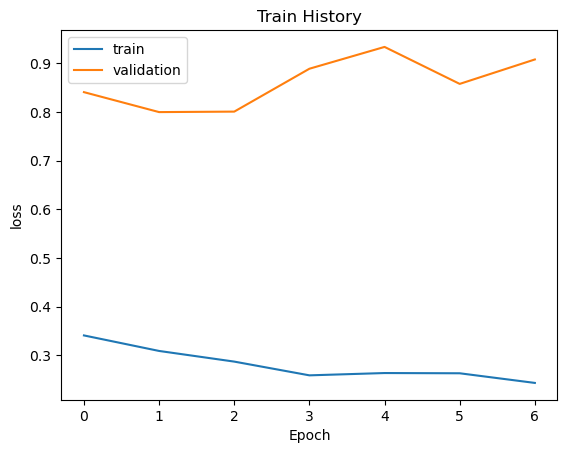

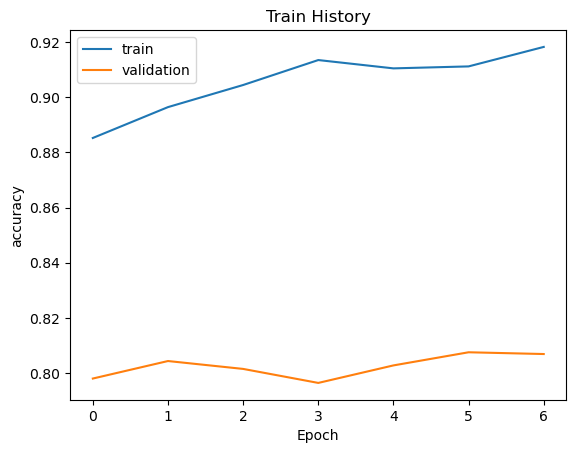

In [32]:
show_train_history(history_fine_aug,'loss','val_loss')
show_train_history(history_fine_aug,'accuracy','val_accuracy')


# check predictions

In [12]:
model = keras.models.load_model('./models/xception_v2_07_0.813.h5')


In [13]:
image_size = (128, 128)
input_shape = (128,128, 3)

batch_size = 32

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    flowers_path,
    validation_split=0.2,
    subset="validation",         
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
    label_mode="categorical",
    class_names=classes
)
val_ds = val_ds.map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)


Found 15740 files belonging to 16 classes.
Using 3148 files for validation.


1/1 [==============================] - 1s 785ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 65ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 75ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 76ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 80ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 73ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 72ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 60ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 69ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 68ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 59ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 65ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 62ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 64ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 60ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


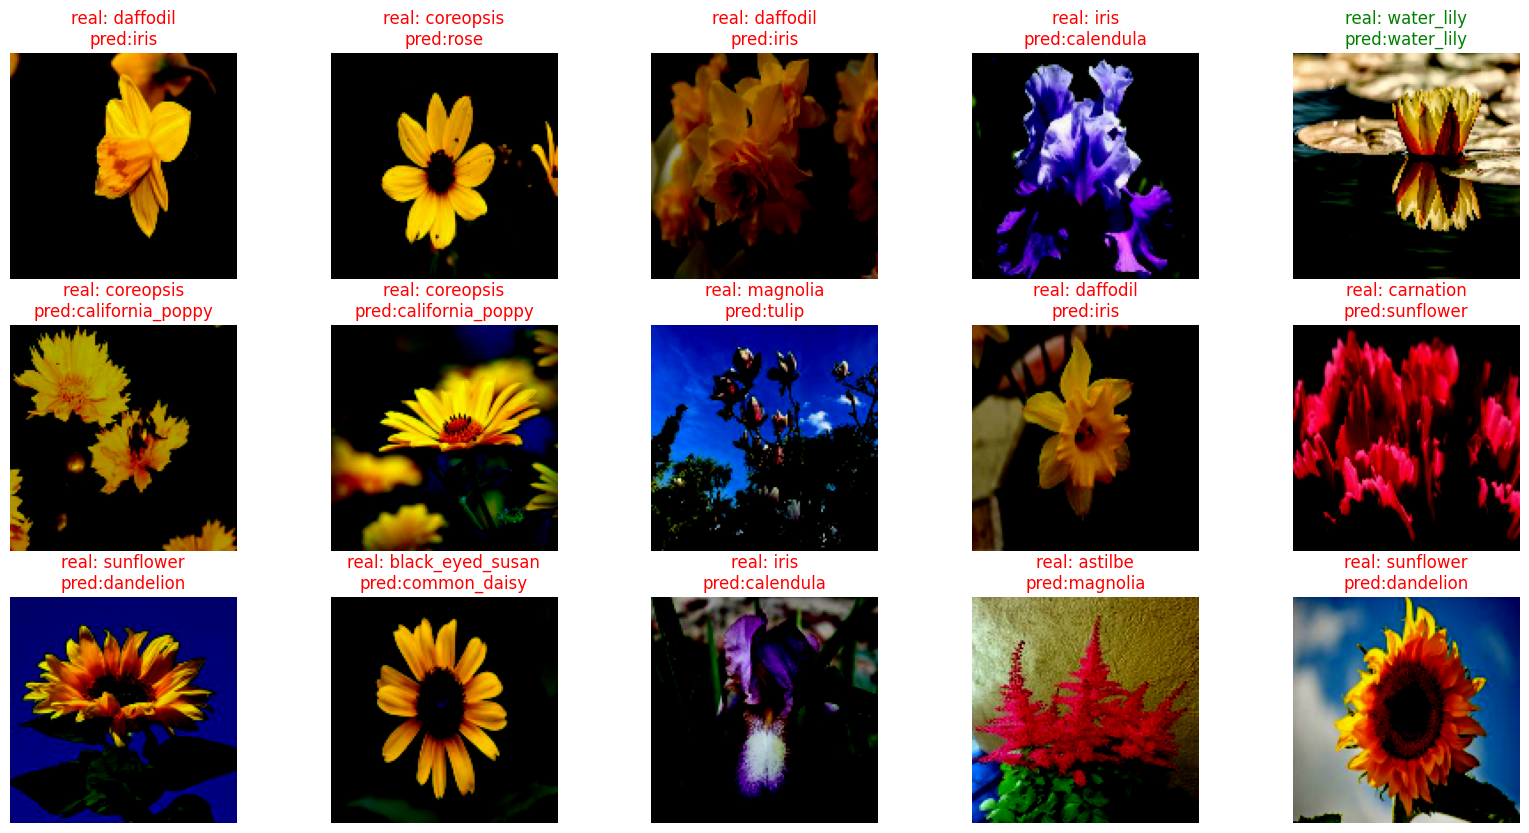

In [14]:
plt.figure(figsize=(20, 10))
for images, labels in val_ds.take(1):
    for i in range(15):
        ax = plt.subplot(3, 5, i + 1)
        
        img_array = images[i].numpy().astype("float")
        prediction = model.predict(np.array([img_array]))
        prediction_name = classes[np.argmax(prediction)]
        real_name = classes[np.argmax(labels[i])]
        
        plt.imshow(img_array)
        if prediction_name == real_name:
            plt.title(f'real: {real_name}\npred:{prediction_name}', fontdict={'color': 'g'})
        else:
            plt.title(f'real: {real_name}\npred:{prediction_name}', fontdict={'color': 'r'})
        
        plt.axis("off")

# Load Model

In [ ]:
Load Model